# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower.

We start by setting up the problem for you.

In [4]:
# Construir una CNN que clasifica imágenes del dataset CIFAR-10.
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

We then definte some of the model for you but leave most of it for you to fill in!

*A hint: your model may want to learn some high level features and then classify them.*

In [5]:
# Definir las capas del modelo
# Primera capa convolucional con 32 filtros de tamaño 3x3.
FIRST_LAYER = layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3))
# Reduce la dimensionalidad usando pooling 2x2.
HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D((2,2))
# Segunda convolución con más filtros.
HIDDEN_LAYER_TYPE_2 = layers.Conv2D(64, (3,3), activation='relu')
# Segundo pooling para reducir más la dimensión.
HIDDEN_LAYER_TYPE_3 = layers.MaxPooling2D((2,2))
# Última convolución para extraer características profundas.
HIDDEN_LAYER_TYPE_4 = layers.Conv2D(64, (3,3), activation='relu')
# Capa oculta densa con 64 neuronas.
HIDDEN_LAYER_TYPE_5 = layers.Dense(64, activation='relu')
# Capa de salida para la clasificación de 10 clases.
LAST_LAYER = layers.Dense(10)  # CIFAR-10 tiene 10 clases

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),    # Convierte la salida en un vector 1D.
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7650 - loss: 0.6736 - val_accuracy: 0.6870 - val_loss: 0.9362
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7736 - loss: 0.6469 - val_accuracy: 0.6967 - val_loss: 0.9003
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7851 - loss: 0.6152 - val_accuracy: 0.7007 - val_loss: 0.8911
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7918 - loss: 0.5936 - val_accuracy: 0.6884 - val_loss: 0.9324
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8021 - loss: 0.5753 - val_accuracy: 0.6971 - val_loss: 0.9157
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8067 - loss: 0.5544 - val_accuracy: 0.7035 - val_loss: 0.8902
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8145 - loss: 0.5369 - val_accuracy: 0.6784 - val_loss: 0.9773
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8188 - loss: 0.5210 

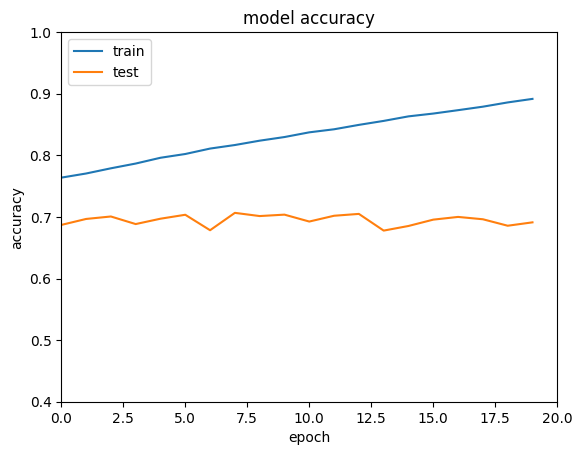

In [7]:
# Configuración de la función de pérdida
# * Es la forma más explícita, donde se indica si los valores de la salida del modelo son logits sin activación.
# * from_logits=True significa que la capa final NO tiene softmax, y la función de pérdida calculará softmax internamente.
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 20  # Puedes experimentar con otros valores

# Compilar el modelo con el optimizador SGD
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model = Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7746 - loss: 0.6346 - val_accuracy: 0.6862 - val_loss: 0.9809
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7976 - loss: 0.5761 - val_accuracy: 0.6970 - val_loss: 0.9522
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8079 - loss: 0.5348 - val_accuracy: 0.6946 - val_loss: 1.0286
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8289 - loss: 0.4818 - val_accuracy: 0.6947 - val_loss: 1.0266
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8491 - loss: 0.4180 - val_accuracy: 0.6931 - val_loss: 1.0154
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8655 - loss: 0.3783 - val_accuracy: 0.6952 - val_loss: 1.1303
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8813 - loss: 0.3380 - val_accuracy: 0.6762 - val_loss: 1.2714
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8928 - loss: 0.3001 

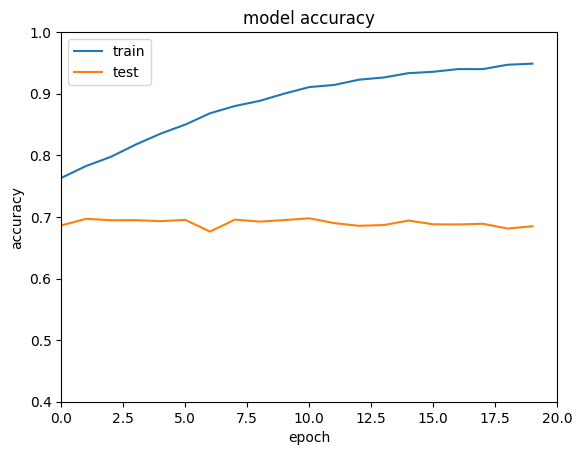

In [8]:
# Configuración de un nuevo optimizador (puedes experimentar aquí)
OPTIMIZER = 'adam'  # Adam suele ser mejor para CNNs

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Entrenar nuevamente el modelo
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
# Graficar la precisión después del cambio de optimizador
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()